In [40]:
import pandas as pd 
import numpy as np 
import plotly.express as px 

train = pd.read_csv("../input/optiver-realized-volatility-prediction/train.csv")


In [41]:
import os 
import sys 
import pathlib

book_path = '../input/optiver-realized-volatility-prediction/book_train.parquet/stock_id=0'
book_file = book_path  + "/" +os.listdir(book_path)[0]
book_example = pd.read_parquet(book_file)


trade_path = '../input/optiver-realized-volatility-prediction/trade_train.parquet/stock_id=0'
trade_file = trade_path  + "/" +os.listdir(trade_path)[0]
trade_example = pd.read_parquet(trade_file)

In [55]:
trade_example

,time_id,seconds_in_bucket,price,size,order_count,stock_id
0,5,21,1.002301,326,12,0
1,5,46,1.002778,128,4,0
2,5,50,1.002818,55,1,0
3,5,57,1.003155,121,5,0
4,5,68,1.003646,4,1,0
5,5,78,1.003762,134,5,0
6,5,122,1.004207,102,3,0
7,5,127,1.004577,1,1,0
8,5,144,1.004370,6,1,0
9,5,147,1.003964,233,4,0


In [42]:
stock_id = '0'
book_example = book_example[book_example['time_id']==5]
book_example.loc[:,'stock_id'] = stock_id
trade_example = trade_example[trade_example['time_id']==5]
trade_example.loc[:,'stock_id'] = stock_id

In [43]:
book_example['wap'] = (book_example['bid_price1'] * book_example['ask_size1'] +
                                book_example['ask_price1'] * book_example['bid_size1']) / (
                                       book_example['bid_size1']+ book_example['ask_size1'])

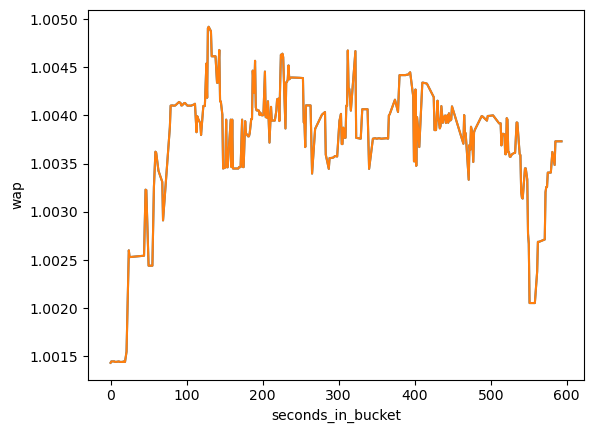

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt
ax  = sn.lineplot(x="seconds_in_bucket", y="wap",data=book_example)
# fig = sn.lineplot(book_example, x="seconds_in_bucket", y="wap", title='WAP of stock_id_0, time_id_5')
plt.show()

In [51]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 

In [52]:
book_example.loc[:,'log_return'] = log_return(book_example['wap'])
book_example = book_example[~book_example['log_return'].isnull()]

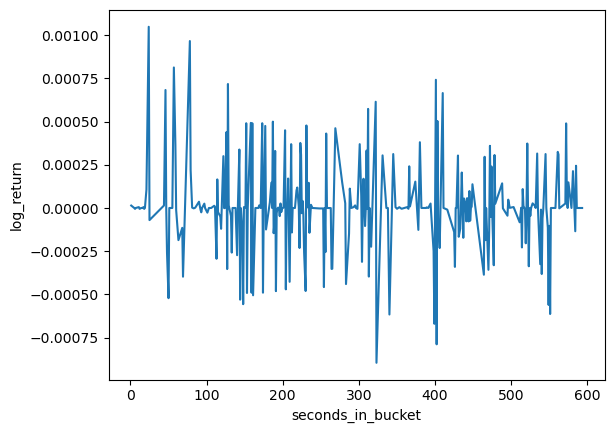

In [54]:
# ax = sns.lineplot(book_example, x="seconds_in_bucket", y="log_return", title='Log return of stock_id_0, time_id_5')
ax  = sn.lineplot(x="seconds_in_bucket", y="log_return",data=book_example)
plt.show()